# **1. Initialization Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data yang digunakan merupakan data Breast Cancer Diagnostic, Berisikan **real-valued features** yang di hitung untuk setiap cell nucleus. Fitur dihitung dari gambar digital fine needle aspirate (FNA) dari massa payudara. Fitur tersebut menggambarkan karakteristik inti sel yang ada pada gambar.

Fitur tersebut akan digunakan untuk menperkirakan pasien menderita kanker ganas **(Malignant)** atau kangker jinak **(Benign)**.



In [2]:
df_raw = pd.read_csv('/content/drive/My Drive/KKPM/breast_cancer.csv')
df_raw

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# **2. Preprocessing Data**

## Encoding target Label

Pada data mentah label berupa text :
*   M = Malignant
*   B = Benign

Agar dapat diolah oleh komputer, label di codekan dengan 
*   M = 1
*   B = 0




In [3]:
df_raw.shape

(569, 33)

In [0]:
df_raw['diag'] = [1 if each == "M" else 0 for each in df_raw.diagnosis]
y_raw = df_raw.diag
list_drop = ['Unnamed: 32','id','diagnosis', 'diag']
x_raw = df_raw.drop(list_drop,axis = 1 )

## Normalization all feature value 

Karena perbedaan antara nilai pada setiap feature sangat tinggi maka kita perlu melakukan normalization atau standirdization pada data data feature. Rumus Normalisasi :

> $X_{normalized} = \frac{X - X_{min}} {X_{max} - X_{min}}$


In [5]:
x_raw = (x_raw -np.min(x_raw))/(np.max(x_raw)-np.min(x_raw))
display(x_raw, y_raw)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,0.385479,0.197976,0.325873,0.283710,0.291906,0.200213,0.131263,0.464861,0.045843,0.115536,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,0.236828,0.464728,0.209490,0.172279,0.137879,0.165064,0.099747,0.317863,0.156160,0.055387,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,0.124896,0.157974,0.125713,0.077976,0.142435,0.263301,0.119444,0.294942,0.074548,0.103547,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,0.222524,0.272896,0.236300,0.148335,0.163477,0.445579,0.179722,0.315211,0.216103,0.182766,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diag, Length: 569, dtype: int64

# **3 Feature Selection**

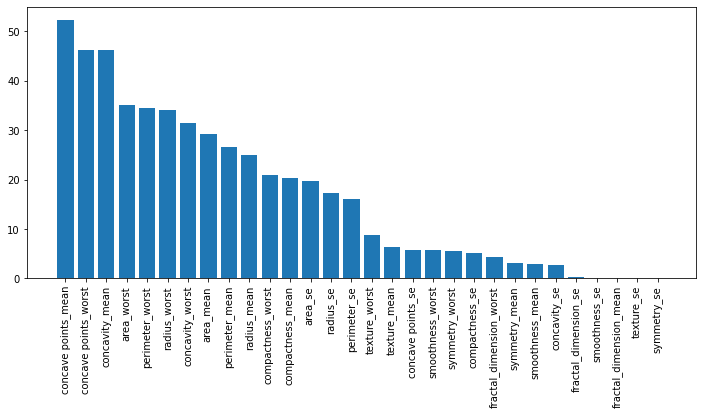

In [6]:
num_selected = 6
select_feature = SelectKBest(chi2, k=num_selected).fit(x_raw, y_raw)

feature_scores = dict(zip(x_raw.columns, select_feature.scores_))
feature_scores = {k: v for k, v in sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)}

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.bar(range(len(feature_scores)), list(feature_scores.values()), align='center')
plt.xticks(range(len(feature_scores)), list(feature_scores.keys()), rotation=90)
plt.show()

selected_feature = list(feature_scores.keys())[:num_selected]

# **4. Data Understanding**

In [0]:
df_clean = x_raw[selected_feature]
df_clean.insert(loc=6, column='diag', value=y_raw)

## Show Num of Each Label

Number of Benign:  357
Number of Malignant :  212


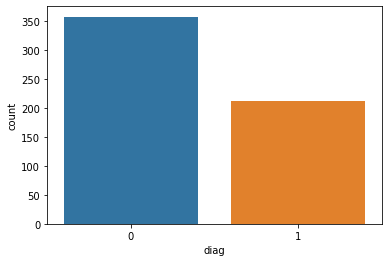

In [8]:
ax = sns.countplot(df_clean['diag'],label="Count")
B, M = df_clean['diag'].value_counts()

print('Number of Benign: ',B)
print('Number of Malignant : ',M)

## Describe Data

Melihat nilai niali penting yang dapat digunakan untuk melihat gambaran besar data

In [9]:
df_clean[selected_feature].describe()

,concave points_mean,concave points_worst,concavity_mean,area_worst,perimeter_worst,radius_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.243137,0.393836,0.208058,0.170906,0.283138,0.296663
std,0.192857,0.225884,0.186785,0.139932,0.167352,0.171940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100944,0.223127,0.069260,0.081130,0.167837,0.180719
50%,0.166501,0.343402,0.144189,0.123206,0.235320,0.250445
75%,0.367793,0.554639,0.306232,0.220901,0.373475,0.386339
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualize data

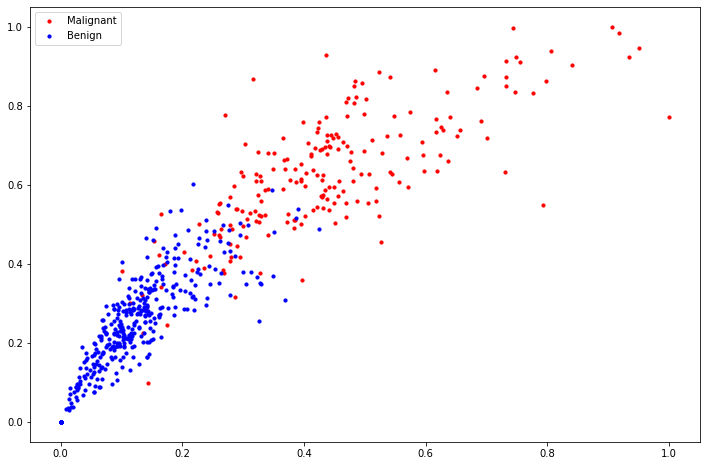

In [10]:
y = df_clean.diag.values
x = df_clean.drop(['diag'], axis=1)

Malignant = df_clean.loc[y == 1]
Benign = df_clean.loc[y == 0]
color = ['red', 'blue', 'blue']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.scatter(Malignant.iloc[:, 0], Malignant.iloc[:, 1], s=10, label='Malignant', color=color[0])
ax.scatter(Benign.iloc[:, 0], Benign.iloc[:, 1], s=10, label='Benign', color=color[1])
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


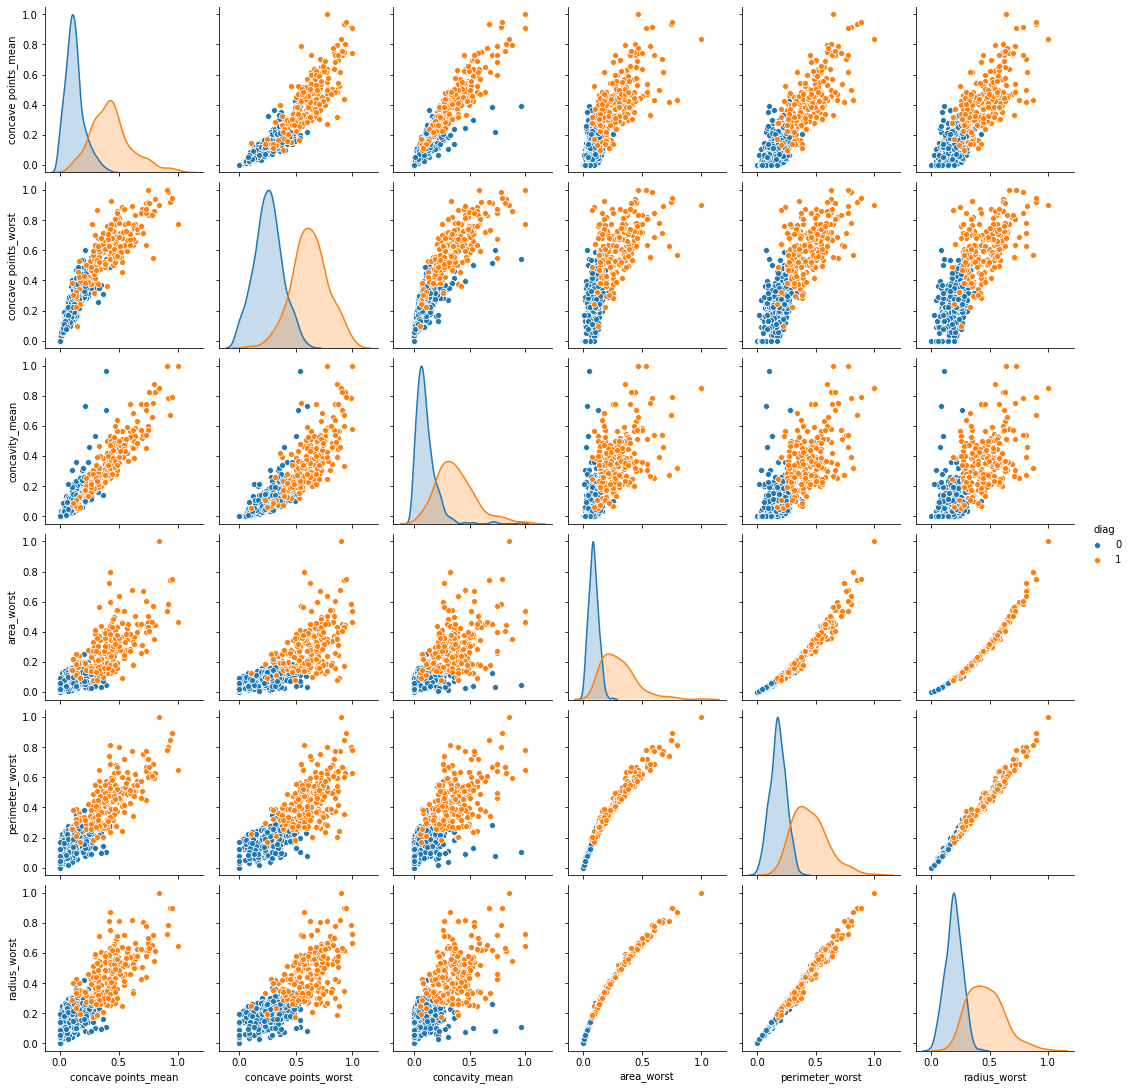

In [11]:
sns.pairplot(df_clean, hue='diag', size=2.5)

# **5 Modelling**

## Logistic Regression

Linear Function :

> $Y = b_0 + b_1 * X$

dimasukkan pada Sigmoid Function :

> $ P = \frac{1}{1 + e^{-Y}}$

menjadi Logistic Function :

> $ P = \frac{1}{1 + e^{-(b_0 + b_1 * X)}}$

dan jika di plot :

![alt text](https://raw.githubusercontent.com/haris0/notebook_learning/master/assets/logits.png)






In [0]:
def sigmoid_activation(result):
  final_result = 1/(1+np.exp(-result))
  return final_result

In [0]:
def predict(x, w, b):
  y_in = sigmoid_activation(np.dot(w,x.T)+b)

  y_out = np.zeros((1,x.shape[0]))
  for i in range(y_in.shape[1]):
    if y_in[0][i] > 0.5:
      y_out[0][i] = 1
  return y_out

Pada logistic regression kita juga membutuhkan log-likelihood function (Juga digunakan untuk menghiuntg cost function):

> $ j(\theta) = \frac{-1}{m} \Sigma^m_{i=1} y^i log(h_{\theta}(x^i)) + (1 - y^i)log(1 - h_{\theta}(x^i))$

kemudian kita gunakan turunan function di atas untuk memperkirakan Bobot dan bias :

> $\frac{\partial}{\partial\theta_j}\ell(\theta)= (y - h_{\theta}(x))x_j$

In [0]:
def model_optimize(w, b, X, Y):
  m = X.shape[0]
  
  #Prediction
  final_result = sigmoid_activation(np.dot(w,X.T)+b)
  Y_T = Y.T
  #Cost fuction
  cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
  
  #Gradient calculation (derivative log likelihood)
  dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T)) # derivative weight
  db = (1/m)*(np.sum(final_result-Y.T))          # derivative bias
  
  grads = {"dw": dw, "db": db}
  
  return grads, cost

Kemudian turunan dari log-likelihood akan dimgunakan pada Gradient Decent Function untuk mencari bobot terbaik secara iteratif :

> $\theta_j = \theta_j - \alpha (y^{(i)} - h_\theta(x^{(i)}))x^{(i)}_j$

In [0]:
def model_predict(w, b, X, Y, learning_rate, no_iterations, printlog):
  costs = []
  for i in range(no_iterations):
    grads, cost = model_optimize(w,b,X,Y)
    dw = grads["dw"]
    db = grads["db"]
    
    #weight update Gradient decent
    w = w - (learning_rate * (dw.T))  
    b = b - (learning_rate * db)
    
    if (i % 1000 == 0):
      costs.append(cost)
      if printlog:
        print("Cost after %i iteration is %f" %(i, cost))
  
  #final parameters
  coeff = {"w": w, "b": b}
  gradient = {"dw": dw, "db": db}
  
  return coeff, gradient, costs

In [0]:
def weightInitialization(n_features):
  w = np.zeros((1,n_features))
  b = 0
  return w,b

In [0]:
def logistic_regressino(x_train, y_train, alpha, no_iter, printlog=True):
  n_features = x_train.shape[1]
  w, b = weightInitialization(n_features)
  #Gradient Descent
  coeff, gradient, costs = model_predict(w, b, x_train, y_train, alpha, no_iter, printlog)
  #Final prediction
  w = coeff["w"]
  b = coeff["b"]
  if printlog:
    print('\n')
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per thousand)')
    plt.title('Cost reduction over time')
    plt.show()

    print('\nOptimized slope / weights\t:', w)
    print('Optimized intercept / bias\t:',b)

  return w, b

## Training Process

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
learning_rate = 1
num_iter = 5000

print("x train \t: ",x_train.shape)
print("x test \t\t: ",x_test.shape)
print("y train \t: ",y_train.shape)
print("y test \t\t: ",y_test.shape)
print("Learning Rate \t: ",learning_rate)
print("Number of Iter \t: ",num_iter)

x train 	:  (483, 6)
x test 		:  (86, 6)
y train 	:  (483,)
y test 		:  (86,)
Learning Rate 	:  1
Number of Iter 	:  5000


Cost after 0 iteration is 0.693147
Cost after 1000 iteration is 0.149962
Cost after 2000 iteration is 0.140428
Cost after 3000 iteration is 0.137279
Cost after 4000 iteration is 0.135851




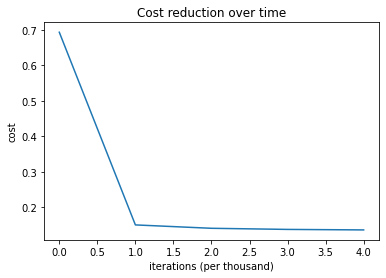


Optimized slope / weights	: [[4.8493368  8.19527216 1.06365362 7.48854379 7.21966864 9.01476585]]
Optimized intercept / bias	: -11.33003889321687


In [19]:
w, b = logistic_regressino(x_train, y_train, learning_rate, num_iter)

## Evaluation

In [20]:
y_tr_pred = predict(x_train, w, b)
print('Training Accuracy\t:',accuracy_score(y_tr_pred.T, y_train))

Training Accuracy	: 0.9440993788819876


### K-Fold Cross Validation (Training Data)

Untuk memastikan akurasi pada data trainig secara menyelurh maka dilakukab cross validation dengan sekema :

![alt text](https://raw.githubusercontent.com/haris0/notebook_learning/master/assets/CrossVal.png)

In [0]:
def cross_val(df, split):
  kfold = KFold(split, True, 1)
  i = 1
  acc = []
  for train_index, test_index in kfold.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    x_train, y_train = train_data[selected_feature], train_data.diag.values
    x_test, y_test = test_data[selected_feature], test_data.diag.values

    w, b = logistic_regressino(x_train, y_train, learning_rate, num_iter, False)
    y_ts_pred = predict(x_test, w, b)

    valid_acc = accuracy_score(y_ts_pred.T, y_test)

    acc.append(valid_acc)
    print('Cross Val',i,'Acc \t:', valid_acc)
    i+=1

  acc = np.array(acc)
  print("\nMean Cross Val\t\t:", acc.mean())

In [22]:
df_train = x_train
df_train.insert(loc=6, column='diag', value=y_train)

cross_val(df_train, 10)

Cross Val 1 Acc 	: 0.9387755102040817
Cross Val 2 Acc 	: 0.9387755102040817
Cross Val 3 Acc 	: 0.9183673469387755
Cross Val 4 Acc 	: 0.9583333333333334
Cross Val 5 Acc 	: 0.8958333333333334
Cross Val 6 Acc 	: 0.9791666666666666
Cross Val 7 Acc 	: 0.9583333333333334
Cross Val 8 Acc 	: 0.8958333333333334
Cross Val 9 Acc 	: 1.0
Cross Val 10 Acc 	: 0.9166666666666666

Mean Cross Val		: 0.9400085034013606


### Confusion Matrix (Testing Data)

Untuk menguji kemampuan generalisasi model yang sudah dibuat maka kita akan menghitung **Akurasi**, **Presisi**, dan **Recall** terhadapa data baru yang tidak ditraining

*   **Akurasi** : menggambarkan seberapa akurat sistem dapat mengklasifikasikan data secara benar.
*   **Presisi** : menggambarkan jumlah data kategori positif yang diklasifikasikan secara benar dibagi dengan total data yang diklasifikasi positif.
*   **Recall** : menunjukkan berapa persen data kategori positif yang terklasifikasikan dengan benar oleh sistem.

dengan memanfaatkan Confusion Matrix :

![alt text](https://raw.githubusercontent.com/haris0/notebook_learning/master/assets/cofMat.png)

Akurasi dihitung dengan :
> **Akurasi** $= \frac{TP + TN}{TP + FP + FN +TN}$

Presisi dihitung dengan :
> **Presisi** $ = \frac{TP}{TP + FP}$

Recall dihitung dengan :
> **Recall** $ = \frac{TP}{TP + FN}$

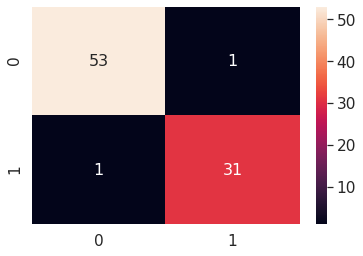

In [23]:
y_ts_pred = predict(x_test, w, b)
cm = confusion_matrix(y_ts_pred.T, y_test)

df_cm = pd.DataFrame(cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

In [24]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
print("\nTP :"+str(TP),"\tFP :"+str(FP),"\nFN :"+str(FN),"\tTN :"+str(TN))

Accuracy = (TP + TN)/(TP + FP + FN + TN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

print('\nAccuracy\t: ',Accuracy)
print('Precision\t: ',Precision)
print('Recall\t\t: ',Recall)


TP :53 	FP :1 
FN :1 	TN :31

Accuracy	:  0.9767441860465116
Precision	:  0.9814814814814815
Recall		:  0.9814814814814815
